# Web Scraping with requests and Beautiful Soup

In [ ]:
"""
Starting from 1996 (Birth Year), collect data on Top 200 Movies of each year, stopping at 2022.

Questions:

    1. Did the sum of the Total_Gross for movies (200/year) in each dataset increase or decrease overtime? (Did movies as a whole become more popular or less popular?) (done)
    2. Did theater numbers increase or decrease for the number 1 grossing movie every year? (done)
    3. What was the most common day of the year for a movie to be released? (done)
    4. What movie distributor earned the most money overall?
    5. What movies had the highest gross earned on opening night?

"""

In [234]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [128]:
def getYear(year):
    year_str = str(year)
    url = f'https://www.boxofficemojo.com/year/{year_str}/?grossesOption=totalGrosses'
    response = requests.get(url)
    page = response.text
    soup = bs(page)
    type(soup)
    rows=soup.findAll('tr')
    movie_list = []
    for row in rows:
        data_row = {}
        data = row.findAll('td')
        if len(data) == 0:
            continue
        else:
            data_row['Rank'] = data[0].text
            data_row['Name'] = data[1].text
            data_row['Gross'] = data[5].text
            data_row['Opening_Gross'] = data[7].text
            data_row['Percentage_Gross'] = data[8].text
            data_row['Max_Theaters'] = data[6].text
            data_row['Opening_Theaters'] = data[9].text

            #Just put year if no date given:
            if data[10].text == '-':
                data_row['Open_Date'] = year_str
            else:
                data_row['Open_Date'] = data[10].text + ', ' + year_str
            if data[11].text == '-':
                data_row['Close_Date'] = year_str
            else:
                data_row['Close_Date'] = data[11].text

            data_row['Distributor'] = data[12].text.split('\n')[0]
            movie_list.append(data_row)
    movie_data = pd.DataFrame(movie_list, columns = ['Rank','Name', 'Gross', 'Opening_Gross', 'Percentage_Gross', 'Max_Theaters', 'Opening_Theaters', 'Open_Date', 'Close_Date', 'Distributor'])
    movie_data = movie_data.replace('-', '0')
    movie_data['Gross'] = movie_data['Gross'].apply(lambda x: float((x.split()[0].replace(',','').replace('$',''))))
    movie_data['Opening_Gross'] = movie_data['Opening_Gross'].apply(lambda x: float((x.split()[0].replace(',','').replace('$',''))))
    movie_data['Max_Theaters'] = movie_data['Max_Theaters'].apply(lambda x: float(x.split()[0].replace(',','')))
    movie_data['Opening_Theaters'] = movie_data['Opening_Theaters'].apply(lambda x: float(x.split()[0].replace(',','')))
    return movie_data

In [129]:
def getTopGross(start_year):
    topGross = pd.DataFrame(columns = ['Rank','Name', 'Gross', 'Opening_Gross', 'Percentage_Gross', 'Max_Theaters', 'Opening_Theaters', 'Open_Date', 'Close_Date', 'Distributor'])
    total = 2022-start_year+1
    for y in range(total):
        year_str = str(start_year)
        url = f'https://www.boxofficemojo.com/year/{year_str}/?grossesOption=totalGrosses'
        response = requests.get(url)
        page = response.text
        soup = bs(page)
        type(soup)
        rows=soup.findAll('tr')[:2]
        movie_list = []
        for row in rows:
            data_row = {}
            data = row.findAll('td')
            if len(data) == 0:
                continue
            else:
                data_row['Rank'] = data[0].text
                data_row['Name'] = data[1].text
                data_row['Gross'] = data[5].text
                data_row['Opening_Gross'] = data[7].text
                data_row['Percentage_Gross'] = data[8].text
                data_row['Max_Theaters'] = data[6].text
                data_row['Opening_Theaters'] = data[9].text

                #Just put year if no date given:
                if data[10].text == '-':
                    data_row['Open_Date'] = year_str
                else:
                    data_row['Open_Date'] = data[10].text + ', ' + year_str
                if data[11].text == '-':
                    data_row['Close_Date'] = year_str
                else:
                    data_row['Close_Date'] = data[11].text

                data_row['Distributor'] = data[12].text.split('\n')[0]
                movie_list.append(data_row)
            movie_data = pd.DataFrame(movie_list, columns = ['Rank','Name', 'Gross', 'Opening_Gross', 'Percentage_Gross', 'Max_Theaters', 'Opening_Theaters', 'Open_Date', 'Close_Date', 'Distributor'])
            movie_data = movie_data.replace('-', '0')
            movie_data['Gross'] = movie_data['Gross'].apply(lambda x: float((x.split()[0].replace(',','').replace('$',''))))
            movie_data['Opening_Gross'] = movie_data['Opening_Gross'].apply(lambda x: float((x.split()[0].replace(',','').replace('$',''))))
            movie_data['Max_Theaters'] = movie_data['Max_Theaters'].apply(lambda x: float(x.split()[0].replace(',','')))
            movie_data['Opening_Theaters'] = movie_data['Opening_Theaters'].apply(lambda x: float(x.split()[0].replace(',','')))
            topGross = pd.concat([topGross, movie_data], ignore_index=True)

        start_year+=1
    return topGross

In [130]:
def getAll(start_year):
    all_years = pd.DataFrame(columns = ['Rank','Name', 'Gross', 'Opening_Gross', 'Percentage_Gross', 'Max_Theaters', 'Opening_Theaters', 'Open_Date', 'Close_Date', 'Distributor'])
    total = 2022-start_year+1
    for y in range(total):
        all_years = pd.concat([all_years, getYear(start_year)], ignore_index=True)
        start_year+=1
    return all_years

In [199]:
def getSum(start_year):
    all_Sum = pd.DataFrame(columns = ['year','total_gross'])
    total = 2022-start_year+1
    for y in range(total):
        df = getYear(start_year)
        data = [[start_year, (df['Gross'].sum())]]
        df_sum = pd.DataFrame(data, columns = ['year','total_gross'])
        all_Sum = pd.concat([all_Sum, df_sum], ignore_index=True)
        start_year+=1
    return all_Sum

In [201]:
sumYearTotal = getSum(1996)
print(sumYearTotal)

    year   total_gross
0   1996  5.674082e+09
1   1997  6.650610e+09
2   1998  6.539188e+09
3   1999  7.276600e+09
4   2000  7.633683e+09
5   2001  8.032489e+09
6   2002  9.118569e+09
7   2003  8.989082e+09
8   2004  9.240122e+09
9   2005  8.729990e+09
10  2006  9.095405e+09
11  2007  9.568848e+09
12  2008  9.609683e+09
13  2009  1.077004e+10
14  2010  1.016288e+10
15  2011  1.004327e+10
16  2012  1.088437e+10
17  2013  1.088856e+10
18  2014  1.035653e+10
19  2015  1.100688e+10
20  2016  1.124796e+10
21  2017  1.099749e+10
22  2018  1.142820e+10
23  2019  1.130718e+10
24  2020  1.423502e+09
25  2021  4.852927e+09
26  2022  7.506707e+09


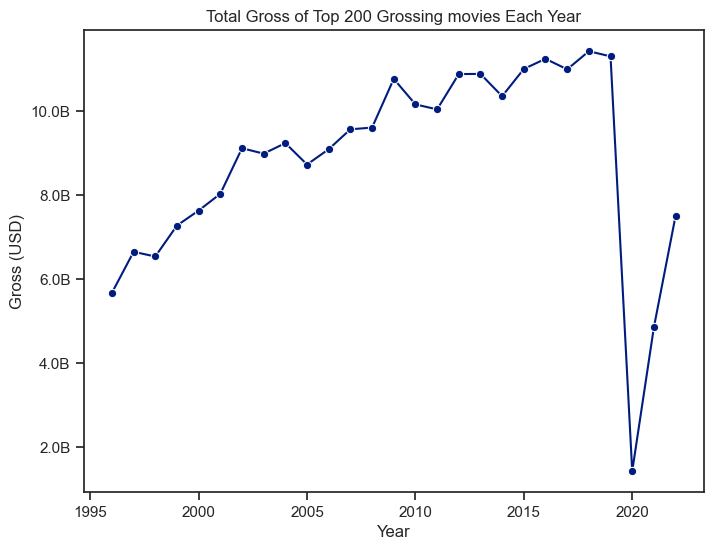

In [241]:
# Question #1: Did the sum of the Total_Gross for movies (200/year) in each dataset increase or decrease overtime? (Did movies as a whole become more popular or less popular?)

sns.lineplot(x='year', y='total_gross', data=sumYearTotal, marker="o")
sns.set_style('ticks')
sns.set_palette('dark')
plt.xlabel("Year")
plt.ylabel("Gross (USD)")
# creates custom formatter for y-ticks
def format_yTick(value, tick_number):
    if value >= 1e9:
        value = value / 1e9
        return '{:.1f}B'.format(value)
    elif value >= 1e6:
        value = value / 1e6
        return '{:.1f}M'.format(value)
    else:
        return int(value)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yTick))
plt.title("Total Gross of Top 200 Grossing movies Each Year")
plt.show()

In [ ]:
# Movies increased in revenue as time goes on, until 2020, when the world was hit with COVID-19 showing a dramatic drop in total gross for all movies across the board. This steadily increases as the world recovered from COVID-19

In [237]:
# 2. Did maximum theater numbers increase or decrease for the number 1 grossing movie each year?

df_topGross = getTopGross(1996)
df_topGross['Open_Date'] = pd.to_datetime(df_topGross['Open_Date'])
theatersTop = pd.DataFrame()
# Format to only include year (YYYY)
theatersTop['year'] = df_topGross['Open_Date'].dt.strftime('%Y')
theatersTop['Max_Theaters'] = df_topGross['Max_Theaters']

    year  Max_Theaters
0   1996        2977.0
1   1997        3265.0
2   1998        2807.0
3   1999        3126.0
4   2000        3256.0
5   2001        3672.0
6   2002        3876.0
7   2003        3703.0
8   2004        4223.0
9   2005        3663.0
10  2006        4133.0
11  2007        4324.0
12  2008        4366.0
13  2009        3461.0
14  2010        4028.0
15  2011        4375.0
16  2012        4349.0
17  2013        4163.0
18  2014        3885.0
19  2015        4134.0
20  2016        4157.0
21  2017        4232.0
22  2018        4084.0
23  2019        4662.0
24  2020        3775.0
25  2021        4336.0
26  2022        4751.0


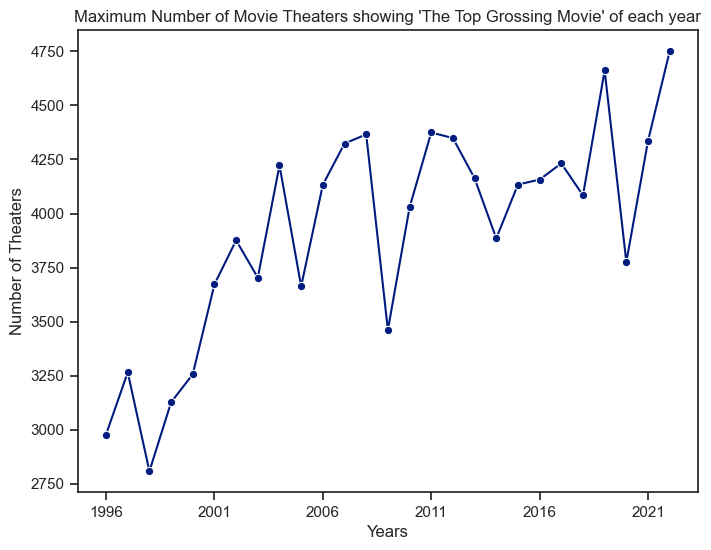

In [242]:
sns.lineplot(x='year', y='Max_Theaters', data=theatersTop, marker="o")
num_labels = 5  # Change this to the desired number of labels
plt.xticks(range(0, len(theatersTop['year']), len(theatersTop['year']) // num_labels),
          theatersTop['year'][::len(theatersTop['year']) // num_labels])
plt.xlabel("Years")
plt.ylabel("Number of Theaters")
plt.title("Maximum Number of Movie Theaters showing \'The Top Grossing Movie\' of each year")
plt.show()

In [ ]:
# Movies with the Top Grossing amount in each year changed drastically, this can show that it might not matter how many theaters a movie is shown in, it really depends on how well the movie is received and how important it is for the consumer to see the movie "In theaters"

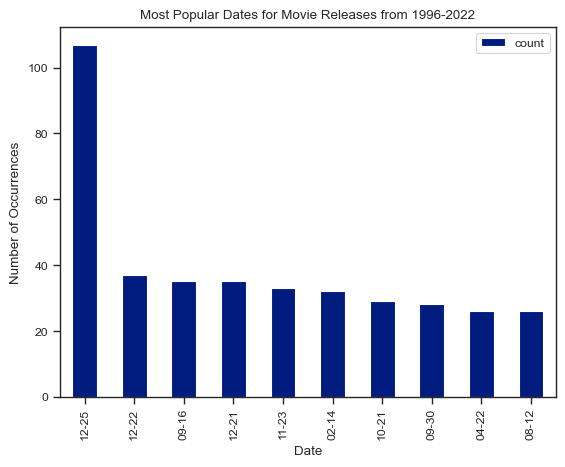

In [219]:
# 3. What was the most common day of the year for a movie to be released?

df_all = getAll(1996)
df_all = df_all.drop_duplicates()
# Convert to date format
df_all['Open_Date'] = pd.to_datetime(df_all['Open_Date'])
dates = pd.DataFrame()
# Format to only include months and days
dates['date'] = df_all['Open_Date'].dt.strftime('%m-%d')
# Count the occurrences of each date in the dataframe
countDate = dates.groupby('date').size().reset_index(name='count')
# Get the dates with the most occurrences
top_10 = countDate.nlargest(10, 'count')
# Plot the results
top_10.plot(x='date', y='count', kind='bar')
plt.title('Most Popular Dates for Movie Releases from 1996-2022')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.show()

In [ ]:
# This graph shows over the course ~3 decades, Christmas day was, without a doubt, the most popular day to release a movie.
# Another interesting factor shown in this graph is most movies were released during the winter months (September - February)
# This is a clear indication that majority of movies will not be released in the summer months, more than likely due to Vacations and traveling.

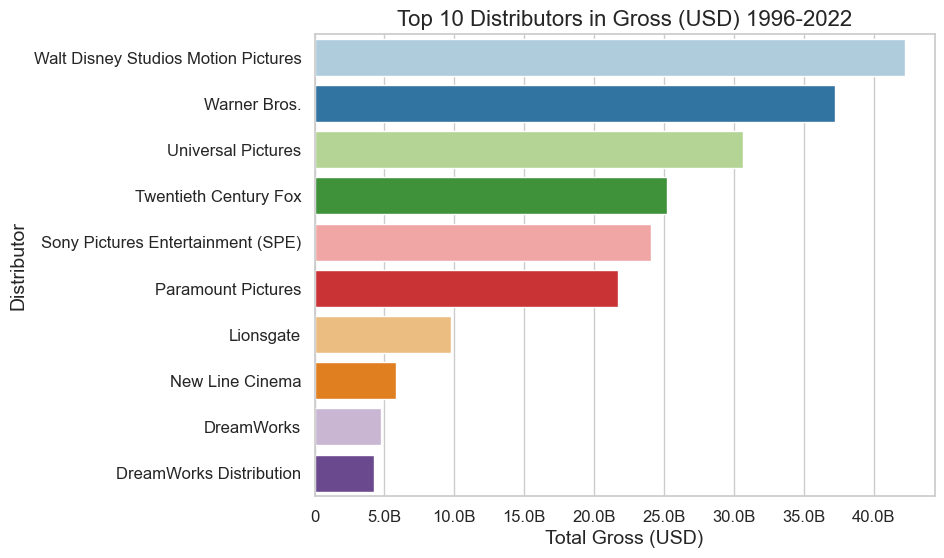

In [288]:
# 4. What movie distributor earned the most money overall?

distributors = df_all['Distributor'].unique()
# calculate the sum of values for each name using a for loop
sums = {}
for i, row in df_all.iterrows():
    name = row['Distributor']
    value = row['Gross']
    if name not in sums:
        sums[name] = value
    else:
        sums[name] += value
distributorGross = pd.DataFrame({'Distributor': list(sums.keys()), 'Total_Gross': list(sums.values())})
top10Distributors = distributorGross.nlargest(10, 'Total_Gross').reset_index(drop = True)
# set the seaborn style and color palette
sns.set(style="whitegrid")
sns.set_palette("Paired")

# create the barplot
ax = sns.barplot(y='Distributor', x='Total_Gross', data=top10Distributors, orient='h')

# set the axis labels and title
ax.set_ylabel('Distributor', fontsize=14)
ax.set_xlabel('Total Gross (USD)', fontsize=14)
ax.set_title('Top 10 Distributors in Gross (USD) 1996-2022', fontsize=16)

def format_xTick(valuex, tick_number):
    if valuex >= 1e9:
        valuex = valuex / 1e9
        return '{:.1f}B'.format(valuex)
    elif valuex >= 1e6:
        valuex = valuex / 1e6
        return '{:.1f}M'.format(valuex)
    else:
        return int(valuex)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xTick))
# set the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# display the plot
plt.show()

In [ ]:
# This graph shows that Disney has earned the most money making movies over the past ~30 years, however, they also made the most movies as well.

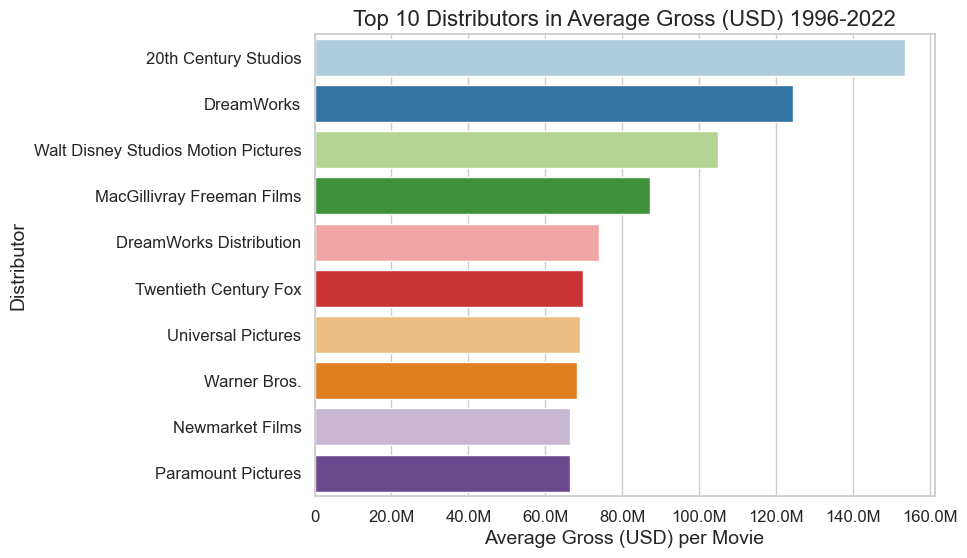

In [300]:
numMovies = df_all['Distributor'].value_counts()
df_distributors = pd.merge(distributorGross, numMovies, on = 'Distributor')

avg = df_distributors['Total_Gross'] / df_distributors['count']
df_distributors['Average'] = avg
top10DistAvg = df_distributors.nlargest(10, 'Average').reset_index(drop = True)

# set the seaborn style and color palette
sns.set(style="whitegrid")
sns.set_palette("Paired")

# create the barplot
ax = sns.barplot(y='Distributor', x='Average', data=top10DistAvg, orient='h')

# set the axis labels and title
ax.set_ylabel('Distributor', fontsize=14)
ax.set_xlabel('Average Gross (USD) per Movie', fontsize=14)
ax.set_title('Top 10 Distributors in Average Gross (USD) 1996-2022', fontsize=16)

def format_xTick(value1, tick_number):
    if value1 >= 1e9:
        value1 = value1 / 1e9
        return '{:.1f}B'.format(value1)
    elif value1 >= 1e6:
        value1 = value1 / 1e6
        return '{:.1f}M'.format(value1)
    else:
        return int(value1)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xTick))
# set the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# display the plot
plt.show()

In [ ]:
# This graph shows on average how much money each of the distributors made PER movie. This can be a more accurate representation of which Distributor is the most "Successful".

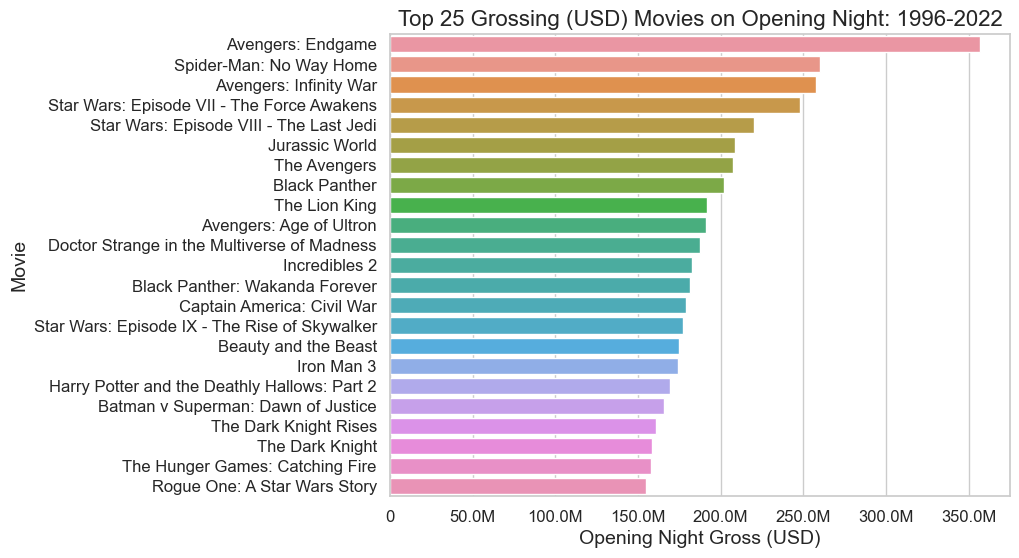

In [313]:
# 5. What movies had the highest gross earned on opening night?

openTopGross = df_all[['Name', 'Opening_Gross']]
top25open = openTopGross.nlargest(25, 'Opening_Gross').reset_index(drop = True)
# set the seaborn style and color palette
sns.set(style="whitegrid")
sns.set_palette("Paired")

# create the barplot
ax = sns.barplot(y='Name', x='Opening_Gross', data=top25open, orient='h')

# set the axis labels and title
ax.set_ylabel('Movie', fontsize=14)
ax.set_xlabel('Opening Night Gross (USD)', fontsize=14)
ax.set_title('Top 25 Grossing (USD) Movies on Opening Night: 1996-2022', fontsize=16)

def format_xTick(value2, tick_number):
    if value2 >= 1e9:
        value2 = value2 / 1e9
        return '{:.1f}B'.format(value2)
    elif value2 >= 1e6:
        value2 = value2 / 1e6
        return '{:.1f}M'.format(value2)
    else:
        return int(value2)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xTick))
# set the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# display the plot
plt.show()

In [ ]:
# This graph shows the top 20 grossing movies on opening night from 1996-2022. Most occurring in recent years.